In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

In [2]:
sns.set(style="whitegrid", palette="muted")

In [ ]:
water_data = pd.read_csv("Indian_water_data.csv")
disease_data = pd.read_csv("water_pollution_disease.csv")


In [15]:
print("Columns in Indian_water_data.csv:\n", water_data.columns.tolist())
print("\nColumns in water_pollution_disease.csv:\n", disease_data.columns.tolist())


Columns in Indian_water_data.csv:
 ['STN code', 'Monitoring Location', 'Year', 'Type Water Body', 'State Name', 'Temperature (C) - Min', 'Temperature (C) - Max', 'Dissolved - Min', 'Dissolved - Max', 'pH - Min', 'pH - Max', 'Conductivity (¬µmho/cm) - Min', 'Conductivity (¬µmho/cm) - Max', 'BOD (mg/L) - Min', 'BOD (mg/L) - Max', 'NitrateN (mg/L) - Min', 'NitrateN (mg/L) - Max', 'Fecal Coliform (MPN/100ml) - Min', 'Fecal Coliform (MPN/100ml) - Max', 'Total Coliform (MPN/100ml) - Min', 'Total Coliform (MPN/100ml) - Max', 'Fecal - Min', 'Fecal - Max']

Columns in water_pollution_disease.csv:
 ['Country', 'Region', 'Year', 'Water Source Type', 'Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'Nitrate Level (mg/L)', 'Lead Concentration (µg/L)', 'Bacteria Count (CFU/mL)', 'Water Treatment Method', 'Access to Clean Water (% of Population)', 'Diarrheal Cases per 100,000 people', 'Cholera Cases per 100,000 people', 'Typhoid Cases per 100,000 people', 'Infant M

In [16]:
water_data.columns = water_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-z0-9_]', '', regex=True)
disease_data.columns = disease_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-z0-9_]', '', regex=True)



In [30]:
print("Columns in Indian_water_data.csv:\n", water_data.columns.tolist())
print("\nColumns in water_pollution_disease.csv:\n", disease_data.columns.tolist())


Columns in Indian_water_data.csv:
 ['stn_code', 'monitoring_location', 'year', 'type_water_body', 'state_name', 'temperature_c_min', 'temperature_c_max', 'dissolved_min', 'dissolved_max', 'ph_min', 'ph_max', 'conductivity_mhocm_min', 'conductivity_mhocm_max', 'bod_mgl_min', 'bod_mgl_max', 'nitraten_mgl_min', 'nitraten_mgl_max', 'fecal_coliform_mpn100ml_min', 'fecal_coliform_mpn100ml_max', 'total_coliform_mpn100ml_min', 'total_coliform_mpn100ml_max', 'fecal_min', 'fecal_max']

Columns in water_pollution_disease.csv:
 ['country', 'region', 'year', 'water_source_type', 'contaminant_level_ppm', 'ph_level', 'turbidity_ntu', 'dissolved_oxygen_mgl', 'nitrate_level_mgl', 'lead_concentration_gl', 'bacteria_count_cfuml', 'water_treatment_method', 'access_to_clean_water_of_population', 'diarrheal_cases_per_100000_people', 'cholera_cases_per_100000_people', 'typhoid_cases_per_100000_people', 'infant_mortality_rate_per_1000_live_births', 'gdp_per_capita_usd', 'healthcare_access_index_0100', 'urbani

In [18]:
print("\nData Overview:\n", water_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   stn_code                      194 non-null    int64  
 1   monitoring_location           194 non-null    object 
 2   year                          194 non-null    int64  
 3   type_water_body               194 non-null    object 
 4   state_name                    194 non-null    object 
 5   temperature_c__min            192 non-null    float64
 6   temperature_c__max            192 non-null    float64
 7   dissolved__min                193 non-null    object 
 8   dissolved__max                193 non-null    float64
 9   ph__min                       194 non-null    float64
 10  ph__max                       194 non-null    float64
 11  conductivity_mhocm__min       181 non-null    object 
 12  conductivity_mhocm__max       181 non-null    float64
 13  bod_m

In [21]:
# 2️⃣ Fill missing values in numeric columns using MEAN or MEDIAN
numeric_cols = water_data.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    # Use median if data is skewed, otherwise mean
    if water_data[col].skew() > 1:
        water_data[col].fillna(water_data[col].median(), inplace=True)
    else:
        water_data[col].fillna(water_data[col].mean(), inplace=True)

# 3️⃣ Fill categorical columns with MODE (most frequent value)
categorical_cols = water_data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    water_data[col].fillna(water_data[col].mode()[0], inplace=True)

# Repeat the same for disease_data
numeric_cols_disease = disease_data.select_dtypes(include=[np.number]).columns
categorical_cols_disease = disease_data.select_dtypes(include=['object']).columns

for col in numeric_cols_disease:
    if disease_data[col].skew() > 1:
        disease_data[col].fillna(disease_data[col].median(), inplace=True)
    else:
        disease_data[col].fillna(disease_data[col].mean(), inplace=True)

for col in categorical_cols_disease:
    disease_data[col].fillna(disease_data[col].mode()[0], inplace=True)


/var/folders/_8/sbcpk7xx6b56ypvdxtfq39d00000gn/T/ipykernel_8054/570893620.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  water_data[col].fillna(water_data[col].median(), inplace=True)
/var/folders/_8/sbcpk7xx6b56ypvdxtfq39d00000gn/T/ipykernel_8054/570893620.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [22]:
print("\nMissing Values:\n", water_data.isnull().sum())
print("\nMissing Values:\n", disease_data.isnull().sum())


Missing Values:
 stn_code                        0
monitoring_location             0
year                            0
type_water_body                 0
state_name                      0
temperature_c__min              0
temperature_c__max              0
dissolved__min                  0
dissolved__max                  0
ph__min                         0
ph__max                         0
conductivity_mhocm__min         0
conductivity_mhocm__max         0
bod_mgl__min                    0
bod_mgl__max                    0
nitraten_mgl__min               0
nitraten_mgl__max               0
fecal_coliform_mpn100ml__min    0
fecal_coliform_mpn100ml__max    0
total_coliform_mpn100ml__min    0
total_coliform_mpn100ml__max    0
fecal__min                      0
fecal__max                      0
dtype: int64

Missing Values:
 country                                       0
region                                        0
year                                          0
water_source_type        

# UNIVARIANT ANALYSIS

In [26]:
water_data.columns = water_data.columns.str.lower().str.replace('__', '_').str.replace(' ', '_')
disease_data.columns = disease_data.columns.str.lower().str.replace('__', '_').str.replace(' ', '_')


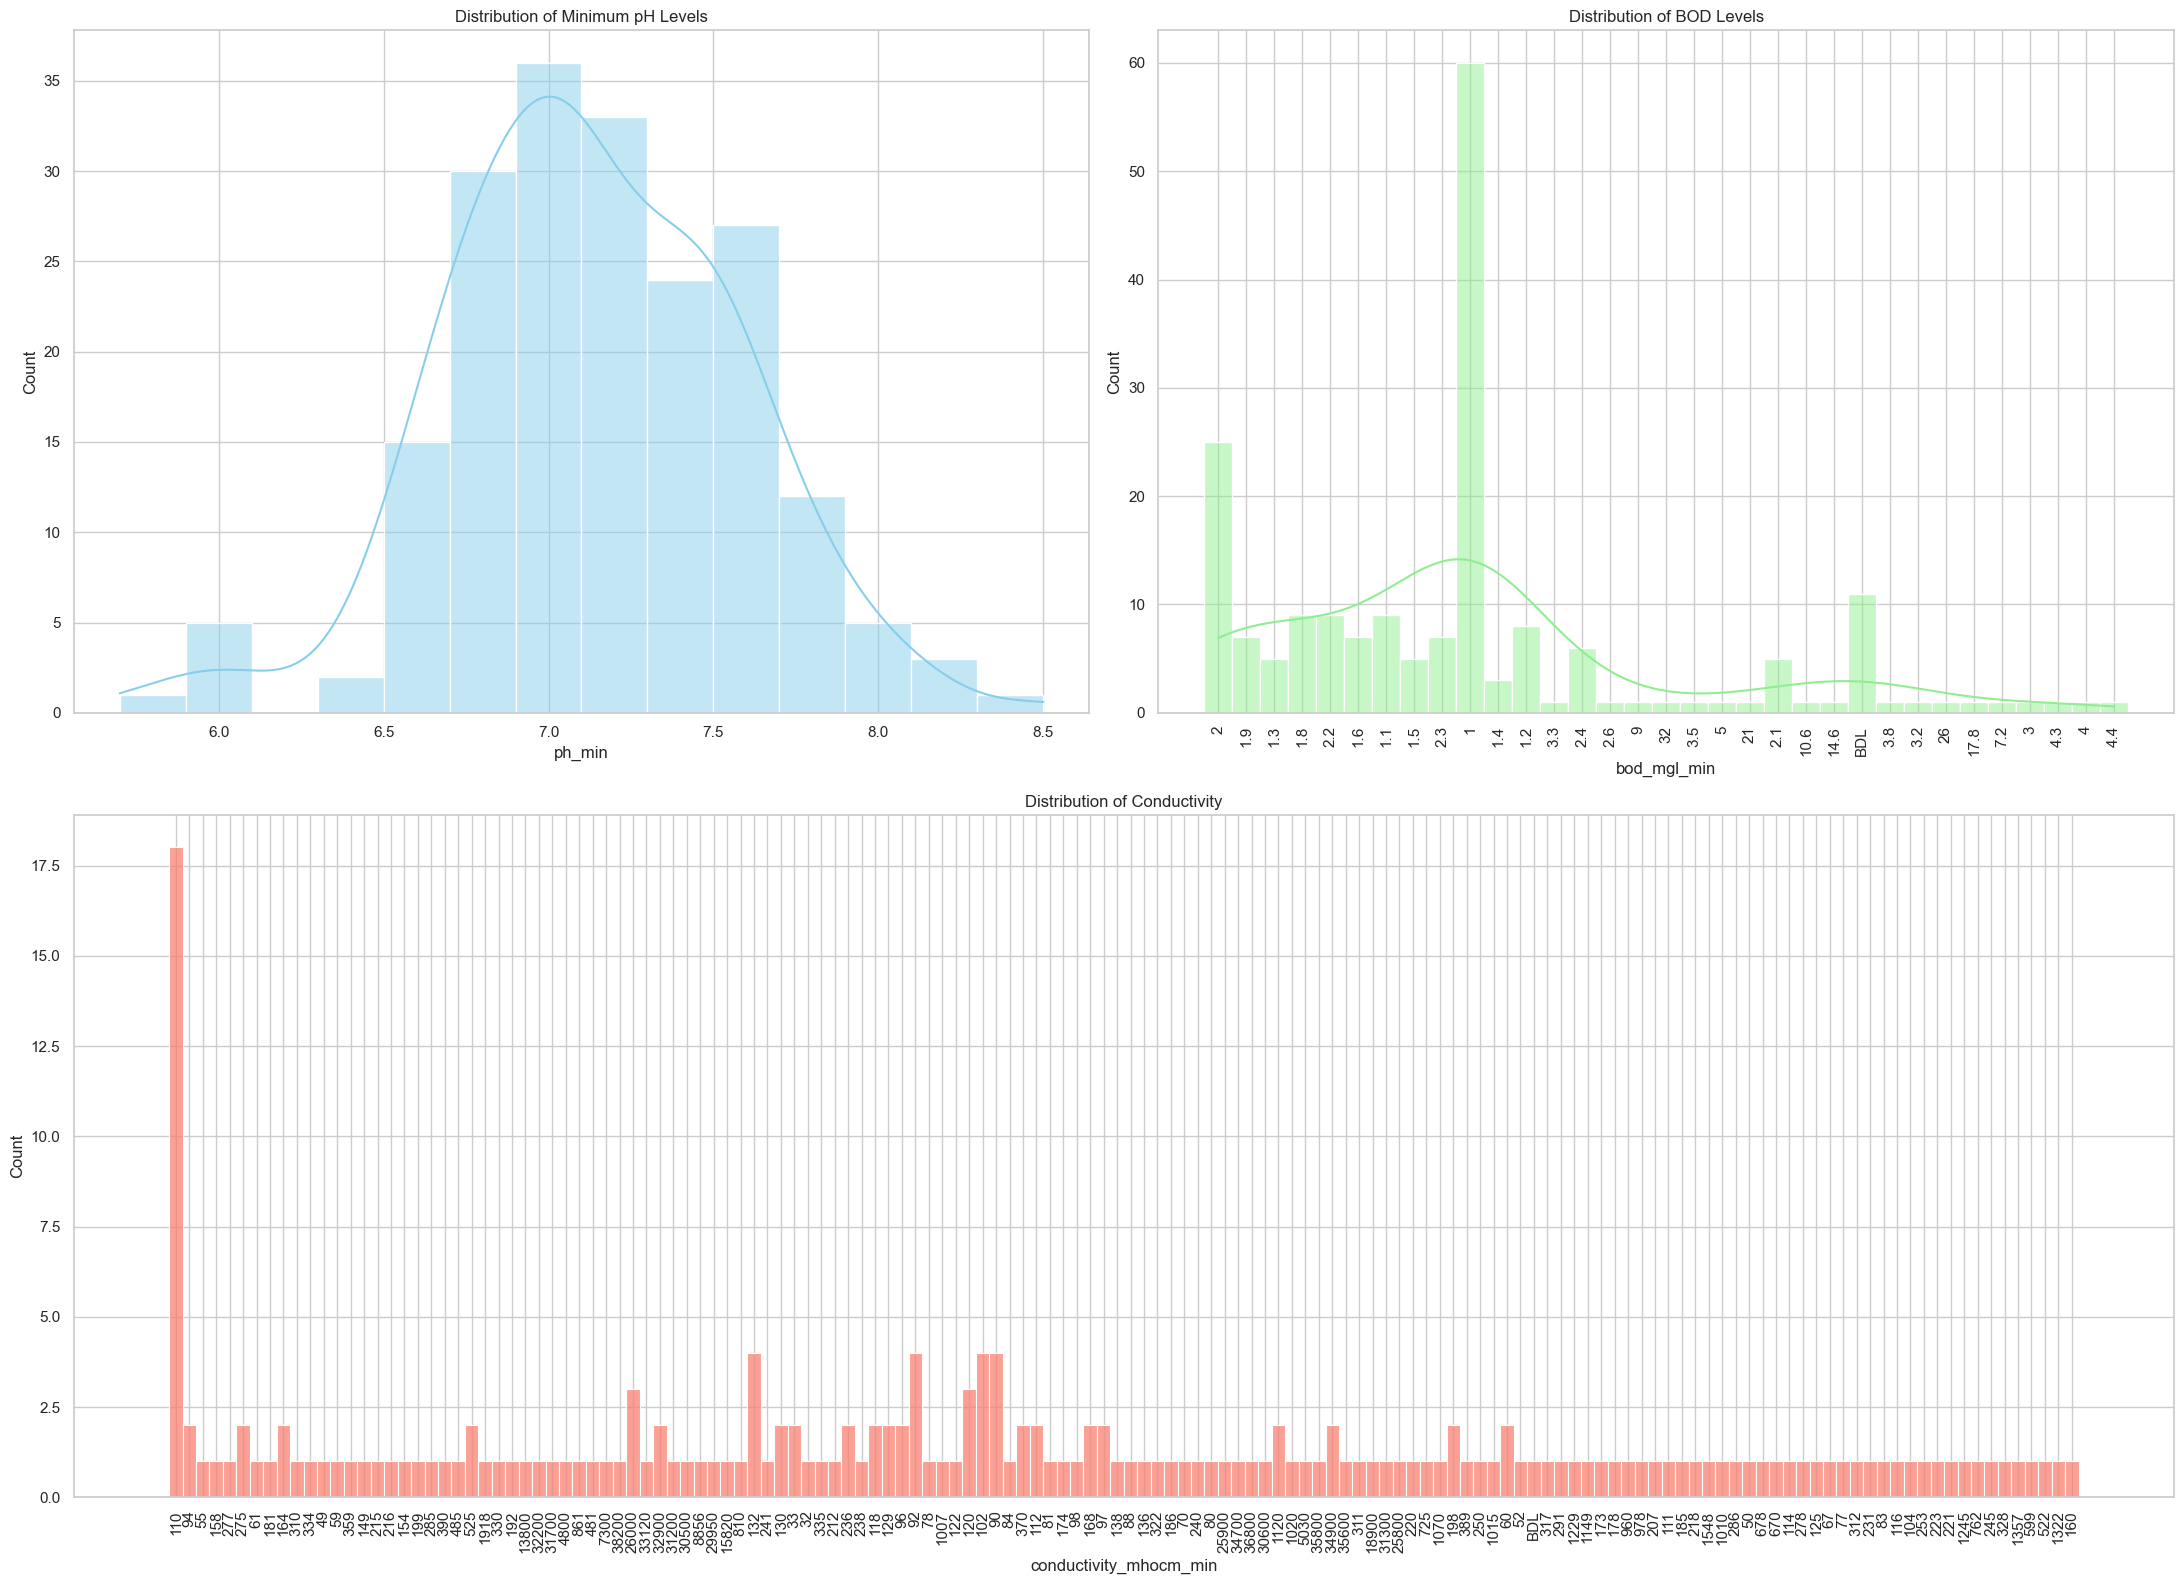

In [ ]:

fig = plt.figure(figsize=(22, 16))
gs = GridSpec(2, 2, figure=fig)

# Plot 1 (top-left)
ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(water_data['ph_min'], kde=True, ax=ax1, color='skyblue')
ax1.set_title('Distribution of Minimum pH Levels')


# Plot 2 (top-right)
ax2 = fig.add_subplot(gs[0, 1])
sns.histplot(water_data['bod_mgl_min'], kde=True, ax=ax2, color='lightgreen',bins=10)
ax2.set_title('Distribution of BOD Levels')
ax2.tick_params(axis='x', rotation=90)

# Plot 3 (bottom, spans both columns)
ax3 = fig.add_subplot(gs[1, :])
sns.histplot(water_data['conductivity_mhocm_min'], ax=ax3, color='salmon',bins = 10)
ax3.set_title('Distribution of Conductivity')
ax3.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


# BIVARIATE ANALYSIS

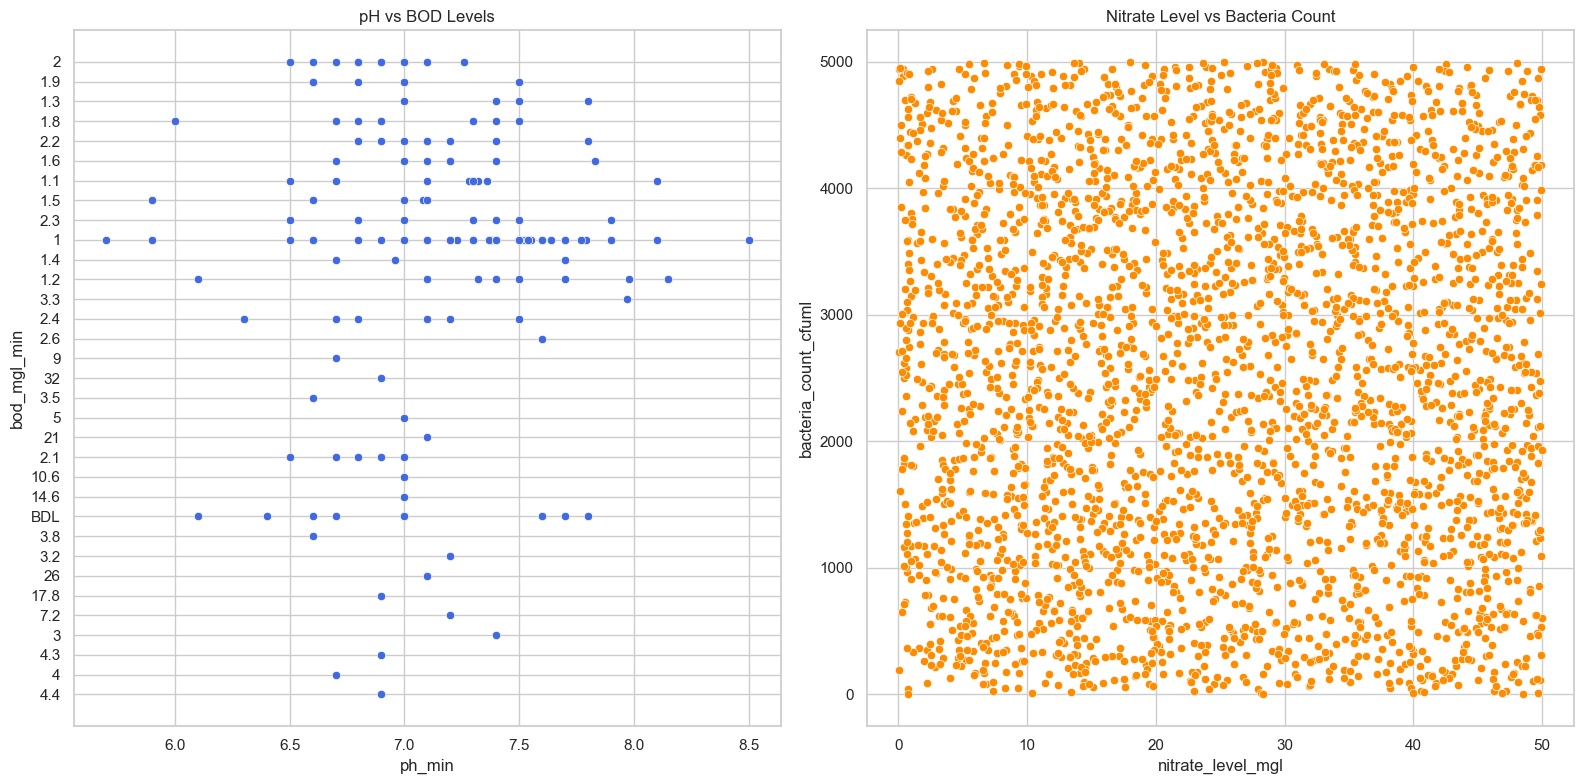

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Relation between pH and BOD (Water Quality)
sns.scatterplot(x='ph_min', y='bod_mgl_min', data=water_data, ax=axes[0], color='royalblue')
axes[0].set_title('pH vs BOD Levels')

# Relation between nitrate level and bacteria (Disease dataset)
sns.scatterplot(x='nitrate_level_mgl', y='bacteria_count_cfuml', data=disease_data, ax=axes[1], color='darkorange')
axes[1].set_title('Nitrate Level vs Bacteria Count')

plt.tight_layout()
plt.show()


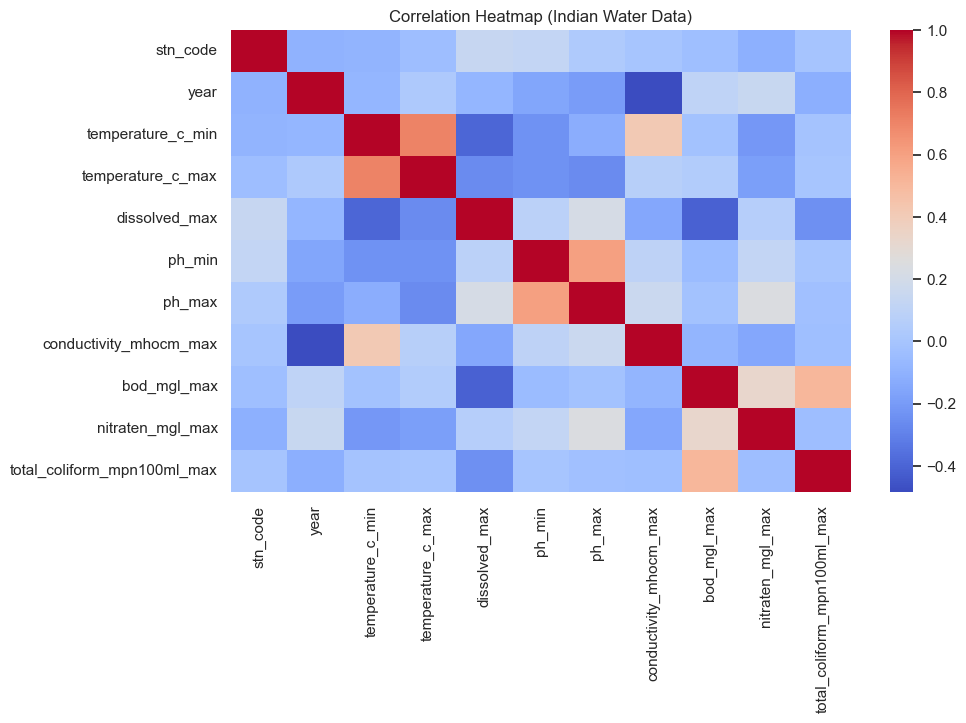

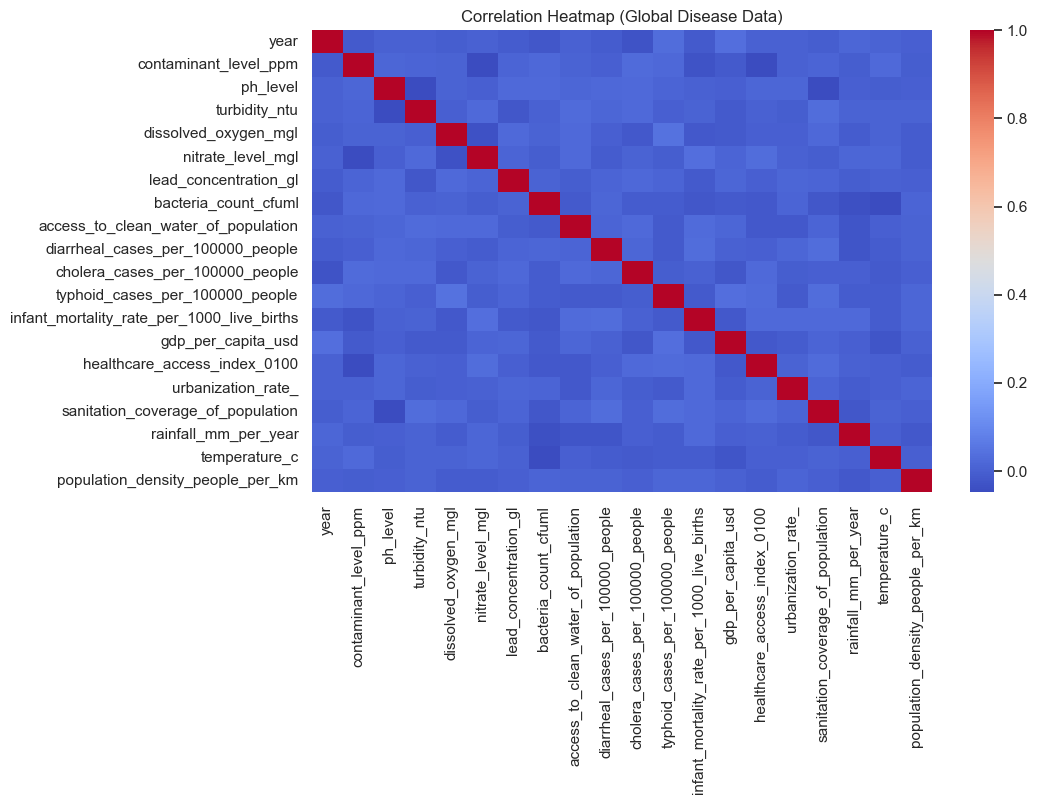

In [78]:
# Correlation heatmap for water pollution data
plt.figure(figsize=(10, 6))
sns.heatmap(water_data.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap (Indian Water Data)')
plt.show()

# Correlation heatmap for disease dataset
plt.figure(figsize=(10, 6))
sns.heatmap(disease_data.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap (Global Disease Data)')
plt.show()

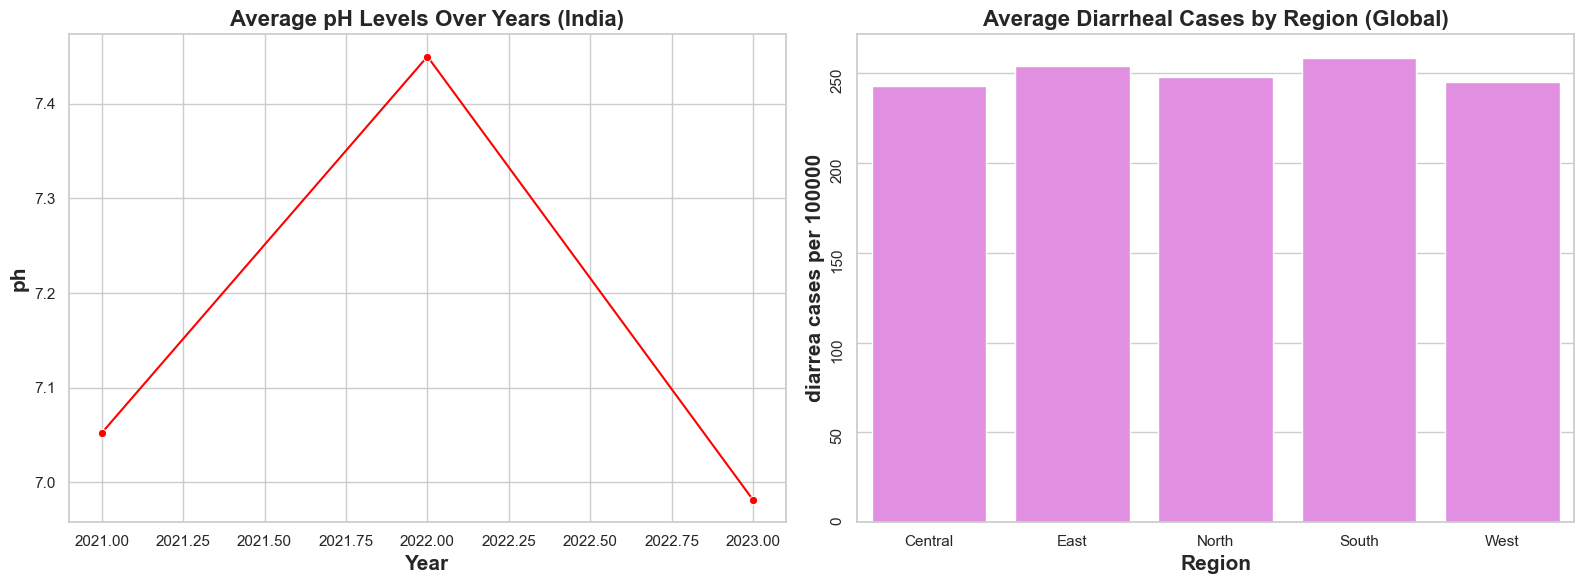

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.lineplot(x='year', y='ph_min', data=water_data.groupby('year')['ph_min'].mean().reset_index(), ax=axes[0], marker='o',color='red')
axes[0].set_title('Average pH Levels Over Years (India)',fontsize=16,weight='bold')
axes[0].set_xlabel("Year",fontsize=15,weight='bold')
axes[0].set_ylabel("ph",fontsize=15,weight='bold')



sns.barplot(x='region', y='diarrheal_cases_per_100000_people', 
            data=disease_data.groupby('region')['diarrheal_cases_per_100000_people'].mean().reset_index(),
            ax=axes[1],color='violet')

axes[1].set_title('Average Diarrheal Cases by Region (Global)',fontsize=16,weight='bold')
axes[1].set_xlabel("Region",fontsize=15,weight='bold')
axes[1].set_ylabel("diarrea cases per 100000",fontsize=15,weight='bold')
axes[1].tick_params(axis='y',rotation=90)

plt.tight_layout()
plt.show()

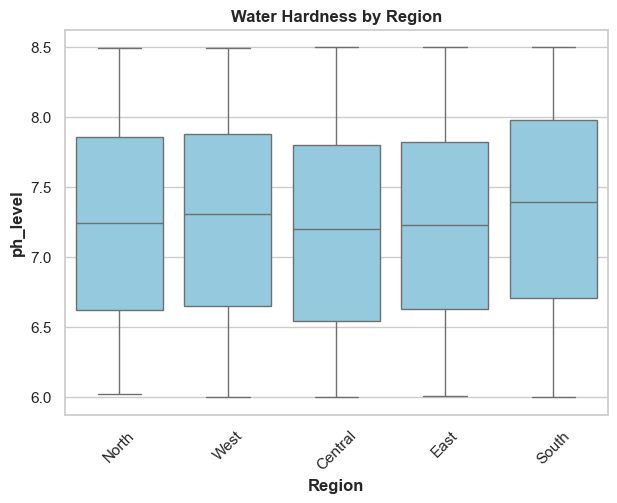

In [120]:
plt.figure(figsize=(7,5))
sns.boxplot(x='region', y='ph_level', data=disease_data , color='skyblue')
plt.title('Water Hardness by Region',weight='bold')
plt.xticks(rotation=45)
plt.xlabel("Region",weight='bold')
plt.ylabel("ph_level",weight='bold')
plt.show()